<a href="https://colab.research.google.com/github/sira4154/Weather_Australia_Tomorrow/blob/main/Predict_weather_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain in Australia

About Dataset
Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

# About Dataset

Data from [kaggle]( https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?datasetId=6012&sortBy=voteCount)

About this file
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?
This column is Yes if the rain for that day was 1mm or more.

- Date : The date of observation
- Location : The common name of the location of the weather station
- MinTemp : The minimum temperature in degrees celsius
- MaxTemp : The maximum temperature in degrees celsius
- Rainfall : The amount of rainfall recorded for the day in mm
- Evaporation : The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine : The number of hours of bright sunshine in the day
- WindGustDir : The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am : Direction of the wind at 9am
- WindDir3pm : Direction of the wind at 3pm
- WindSpeed9am : Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm : Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am : Humidity(percent) at 9 am 
- Humidity3pm : Humidity (percent) at 3pm
- Pressure9am : Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm : Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am : Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- Cloud3pm : Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- Temp9am : Temperature (degrees C) at 9am
- Temp3pm : Temperature (degrees C) at 3pm
- RainToday : Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow : The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk". (Target)

In [402]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [404]:
df = pd.read_csv("/content/drive/MyDrive/Data sci kmitl/weatherAUS.csv")

# EDA (Exploratory Data Analysis)

In [405]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [406]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [407]:
df.shape

(145460, 23)

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [409]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [410]:
 df.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [411]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [412]:
nan_label = pd.isnull(df["RainTomorrow"])
df[nan_label]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,2016-02-07,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,2016-06-22,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,2016-06-23,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,2017-02-21,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


In [413]:
data = df.copy()
data = data.dropna(subset = ["RainTomorrow"])
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

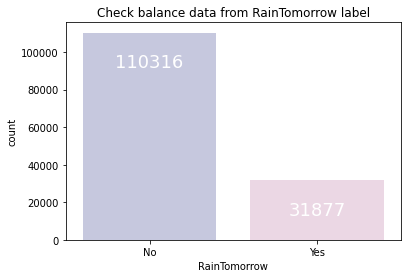

In [414]:
ax = sns.countplot(x = "RainTomorrow", data = data, palette= ["#C2C4E2","#EED4E5"])
ax.set_title("Check balance data from RainTomorrow label")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)

# Categorical 

In [415]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [416]:
# chaging data type to datetime type
data['Date']= pd.to_datetime(data["Date"])
#Create new columns year, month and day 
data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['Day'] = data['Date'].dt.day
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [417]:
data["year"].value_counts()

2016    17508
2014    17400
2015    17231
2009    16595
2010    16419
2013    16097
2011    15126
2012    15044
2017     8466
2008     2246
2007       61
Name: year, dtype: int64

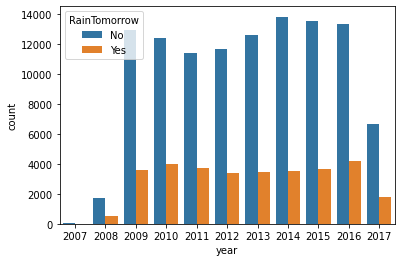

In [418]:
sns.countplot(x = "year", hue = "RainTomorrow", data = data)

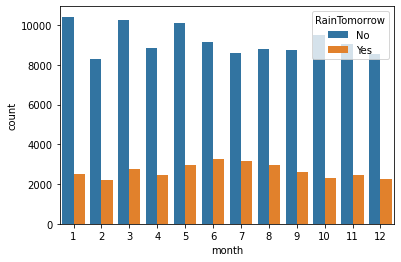

In [419]:
sns.countplot(x = "month", hue = "RainTomorrow", data = data)

### Location

In [420]:
data["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

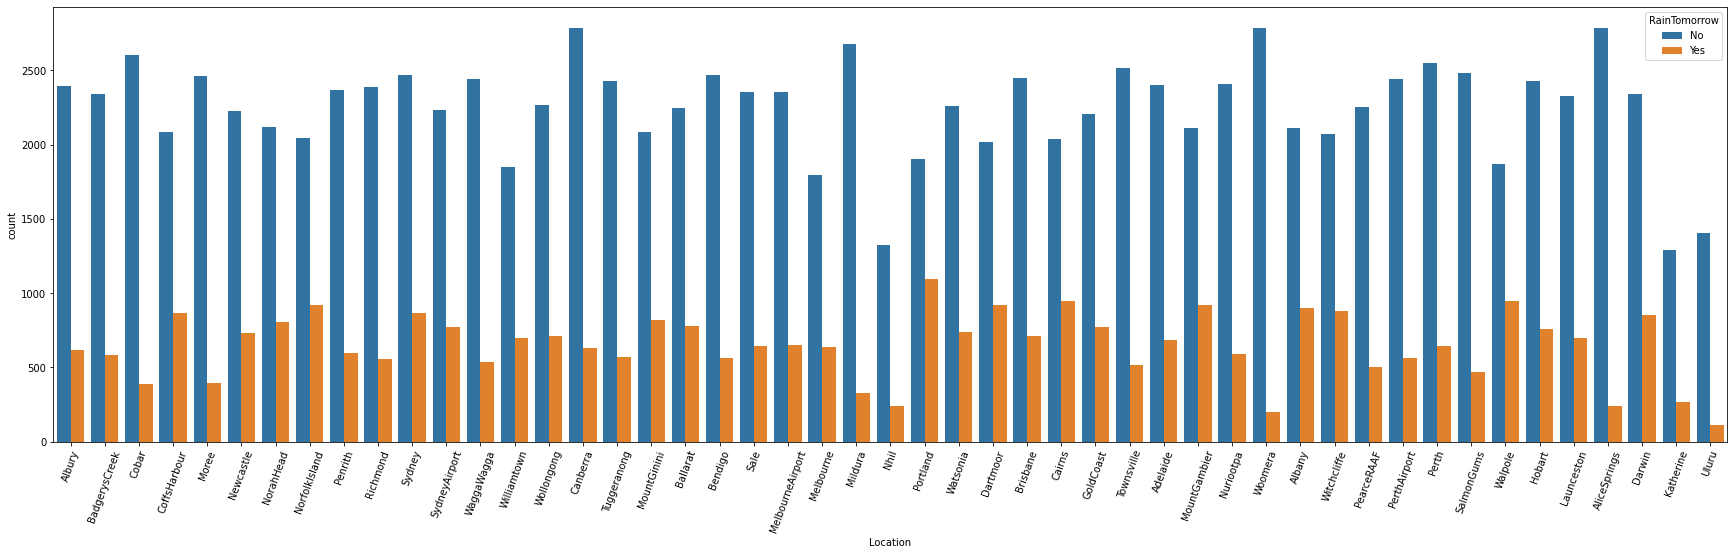

In [421]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=70)
sns.countplot(data= data, x = "Location", hue= "RainTomorrow")

### WindGustDir

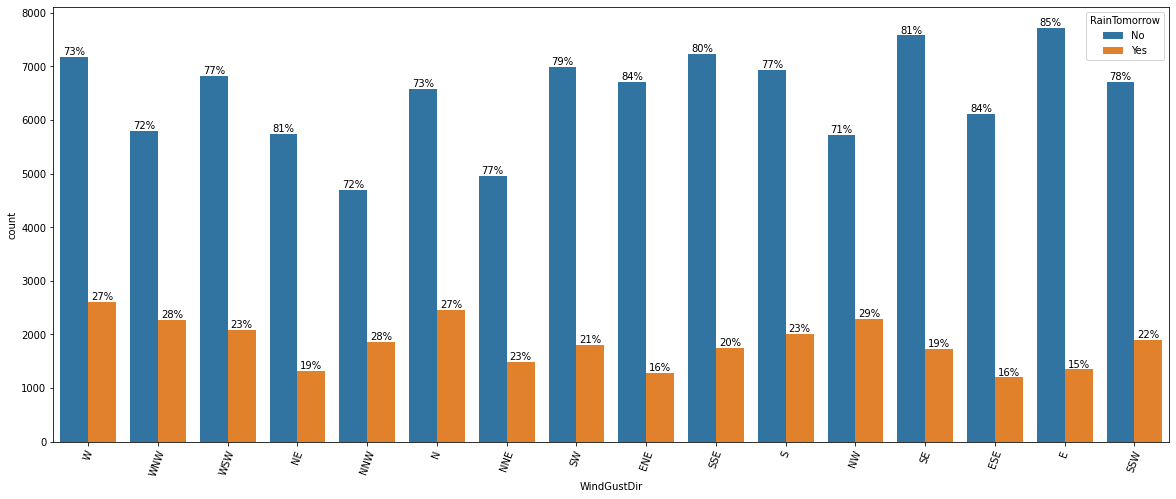

In [422]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=70)
ax = sns.countplot(data= data, x = "WindGustDir", hue= "RainTomorrow")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

### WindDir9am

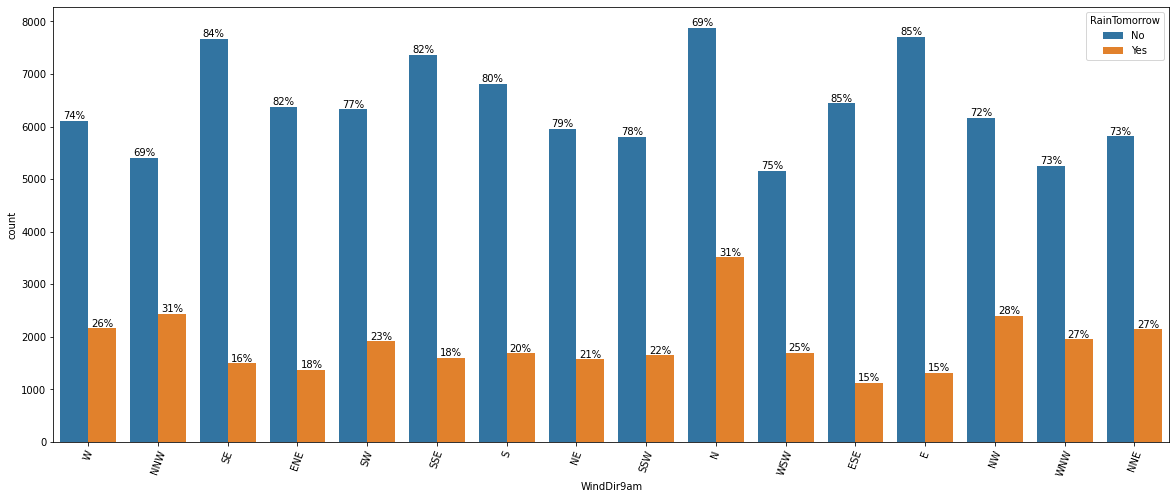

In [423]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=70)
ax = sns.countplot(data= data, x = "WindDir9am", hue= "RainTomorrow")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

### WindDir3pm

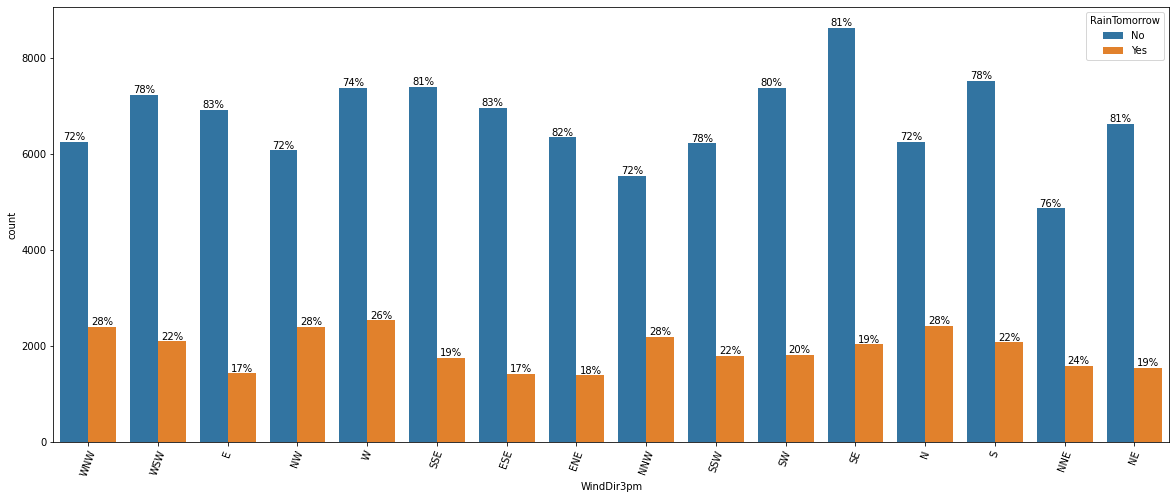

In [424]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=70)
ax = sns.countplot(data= data, x = "WindDir3pm", hue= "RainTomorrow")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

## Numerical

In [425]:
ty = (data.dtypes == "float64")
num_cols = list(ty[ty].index)
print(num_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


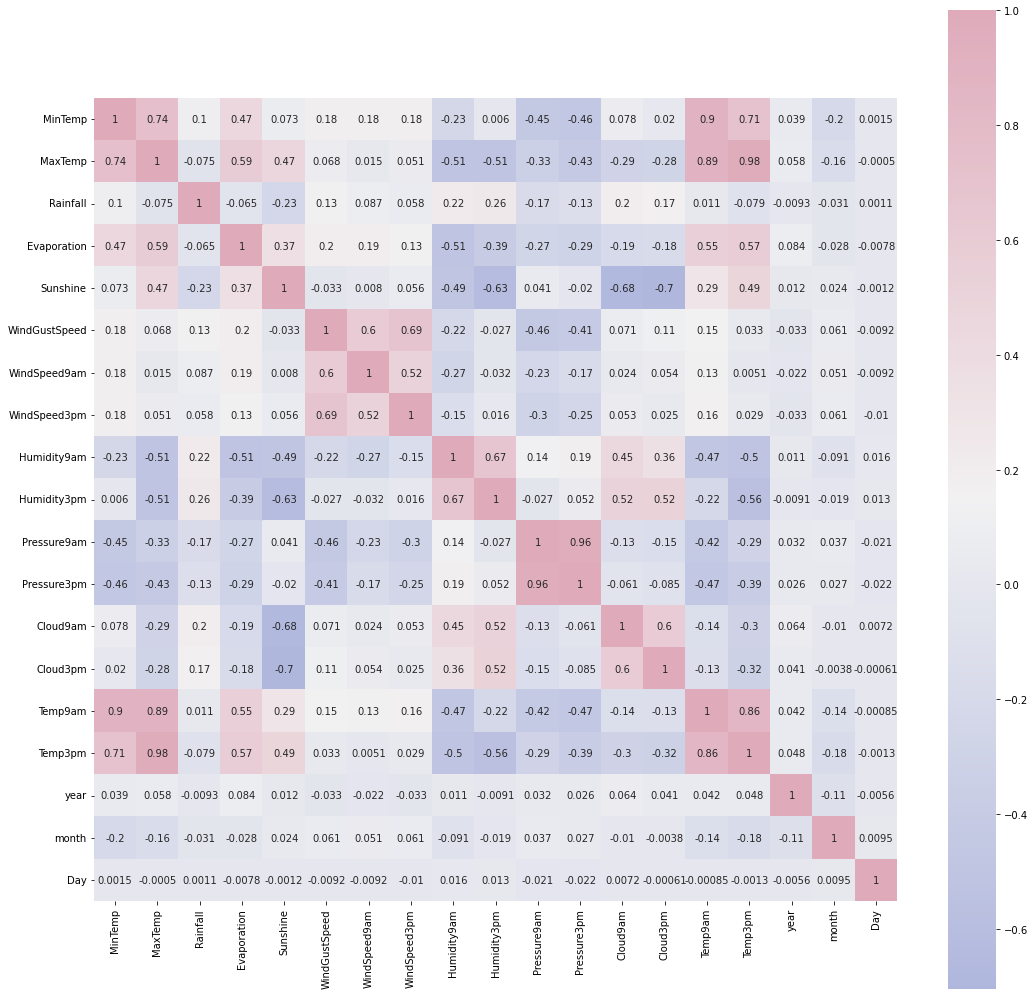

In [426]:
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [427]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

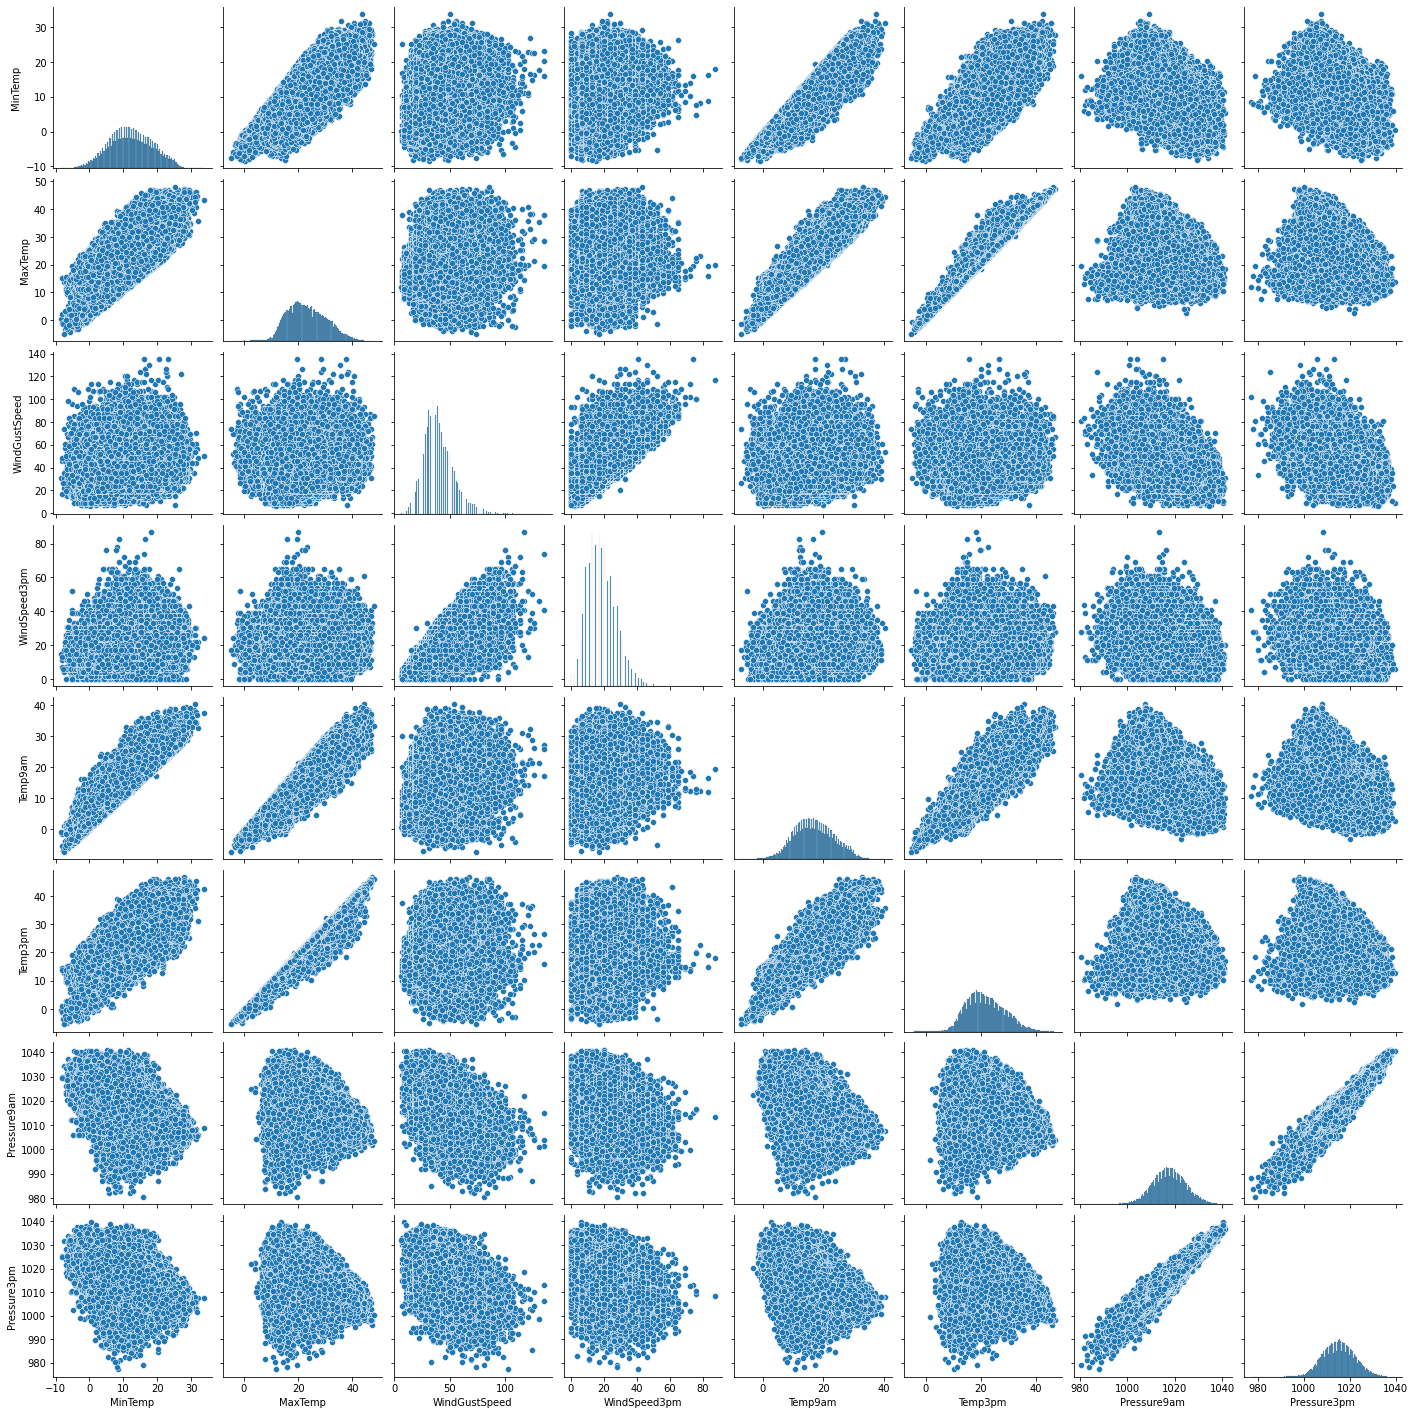

In [428]:
sns.pairplot(data[["MinTemp","MaxTemp","WindGustSpeed","WindSpeed3pm","Temp9am","Temp3pm","Pressure9am", "Pressure3pm"]], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

# Data preprocessing 

In [429]:
missing = data.isnull().sum()
total_missing = missing[missing != 0 ]
missing_df = pd.DataFrame(total_missing, columns=["number_of_missing_values"])
missing_df["percent"] = total_missing * 100 / len(data)
missing_df.sort_values(by = ["percent"], ascending = False)

,number_of_missing_values,percent
Sunshine,67816,47.692924
Evaporation,60843,42.789026
Cloud3pm,57094,40.152469
Cloud9am,53657,37.735332
Pressure9am,14014,9.855619
Pressure3pm,13981,9.832411
WindDir9am,10013,7.041838
WindGustDir,9330,6.561504
WindGustSpeed,9270,6.519308
WindDir3pm,3778,2.656952


## Replace missing data (Categorical)

In [430]:
for i in categorical :
  print(i,data[i].isnull().sum())

Date 0
Location 0
WindGustDir 9330
WindDir9am 10013
WindDir3pm 3778
RainToday 1406
RainTomorrow 0


In [431]:
for i in categorical:
    data[i].fillna(data[i].mode()[0], inplace=True)

## Replace missing data (Numerical)

In [432]:
for i in num_cols :
  print(i, data[i].isnull().sum())

MinTemp 637
MaxTemp 322
Rainfall 1406
Evaporation 60843
Sunshine 67816
WindGustSpeed 9270
WindSpeed9am 1348
WindSpeed3pm 2630
Humidity9am 1774
Humidity3pm 3610
Pressure9am 14014
Pressure3pm 13981
Cloud9am 53657
Cloud3pm 57094
Temp9am 904
Temp3pm 2726


In [433]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

In [434]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Evaporation    142193 non-null  float64       
 6   Sunshine       142193 non-null  float64       
 7   WindGustDir    142193 non-null  object        
 8   WindGustSpeed  142193 non-null  float64       
 9   WindDir9am     142193 non-null  object        
 10  WindDir3pm     142193 non-null  object        
 11  WindSpeed9am   142193 non-null  float64       
 12  WindSpeed3pm   142193 non-null  float64       
 13  Humidity9am    142193 non-null  float64       
 14  Humidity3pm    142193 non-null  float64       
 15  

## Check Outlier 

In [435]:
data1 = data[num_cols]
data1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.5,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9
145455,2.8,23.4,0.0,4.8,8.5,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4
145456,3.6,25.3,0.0,4.8,8.5,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5
145457,5.4,26.9,0.0,4.8,8.5,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1


In [436]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

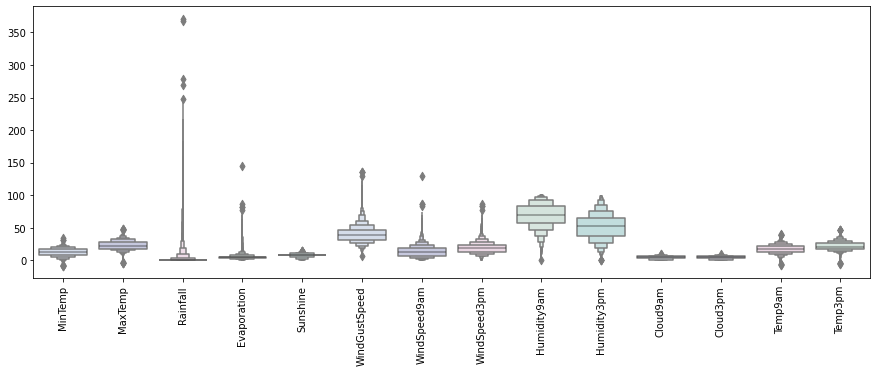

In [437]:
#Detecting outliers
#looking at the scaled features
data1 = data[["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]]
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(15,5))
sns.boxenplot(data = data1,palette = colours)
plt.xticks(rotation=90)
plt.show()

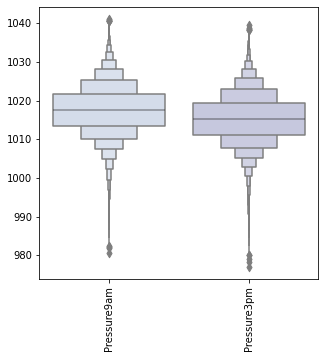

In [438]:
data1 = data[["Pressure9am", "Pressure3pm"]]
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(5,5))
sns.boxenplot(data = data1,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [439]:
for i in  num_cols :
 cal_Q1 = data[i].quantile(0.25)
 cal_Q3 = data[i].quantile(0.75)
 cal_IQR = cal_Q3 - cal_Q1
 lower_limit = cal_Q1 - 1.5 * cal_IQR
 upper_limit = cal_Q3 + 1.5 * cal_IQR
 print('Outliers values of {cols} < {lowerboundary:.2f} or > {upperboundary:.2f}'.format(lowerboundary=lower_limit, upperboundary=upper_limit, cols = i))

Outliers values of MinTemp < -6.20 or > 30.60
Outliers values of MaxTemp < 2.45 or > 43.65
Outliers values of Rainfall < -0.90 or > 1.50
Outliers values of Evaporation < 1.90 or > 7.50
Outliers values of Sunshine < 7.45 or > 9.45
Outliers values of WindGustSpeed < 8.50 or > 68.50
Outliers values of WindSpeed9am < -11.00 or > 37.00
Outliers values of WindSpeed3pm < -3.50 or > 40.50
Outliers values of Humidity9am < 18.00 or > 122.00
Outliers values of Humidity3pm < -5.00 or > 107.00
Outliers values of Pressure9am < 1001.05 or > 1034.25
Outliers values of Pressure3pm < 998.40 or > 1032.00
Outliers values of Cloud9am < -1.50 or > 10.50
Outliers values of Cloud3pm < 1.00 or > 9.00
Outliers values of Temp9am < -1.50 or > 35.30
Outliers values of Temp3pm < 2.30 or > 40.70


remove outlier

In [440]:
data = data[(data["MinTemp"] > -6.20) & (data["MinTemp"] < 30.60)]
data = data[(data["MaxTemp"] > 2.45) & (data["MaxTemp"] < 43.65)]
data = data[(data["Rainfall"] > -0.90) & (data["Rainfall"] < 1.5)]
data = data[(data["Evaporation"] > 1.9) & (data["Evaporation"] < 7.5)]
data = data[(data["Sunshine"] > 7.45) & (data["Sunshine"] < 9.45)]
data = data[(data["WindGustSpeed"] > 8.5) & (data["WindGustSpeed"] < 68.5)]
data = data[(data["WindSpeed9am"] > -11) & (data["WindSpeed9am"] < 37)]
data = data[(data["WindSpeed3pm"] > -3.5) & (data["WindSpeed3pm"] < 40.50)]
data = data[(data["Humidity9am"] > 18) & (data["Humidity9am"] < 122)]
data = data[(data["Humidity3pm"] > -5) & (data["Humidity3pm"] < 107)]
data = data[(data["Pressure9am"] > 1001.05) & (data["Pressure9am"] < 1034.25)]
data = data[(data["Pressure3pm"] > 998.40) & (data["Pressure3pm"] < 1032)]
data = data[(data["Cloud9am"] > -1.5) & (data["Cloud9am"] < 10.50)]
data = data[(data["Cloud3pm"] > 1) & (data["Cloud3pm"] < 9)]
data = data[(data["Temp9am"] > -1.5) & (data["Temp9am"] < 35.30)]
data = data[(data["Temp3pm"] > 2.3) & (data["Temp3pm"] < 40.70)]

In [441]:
data.shape

(49826, 26)

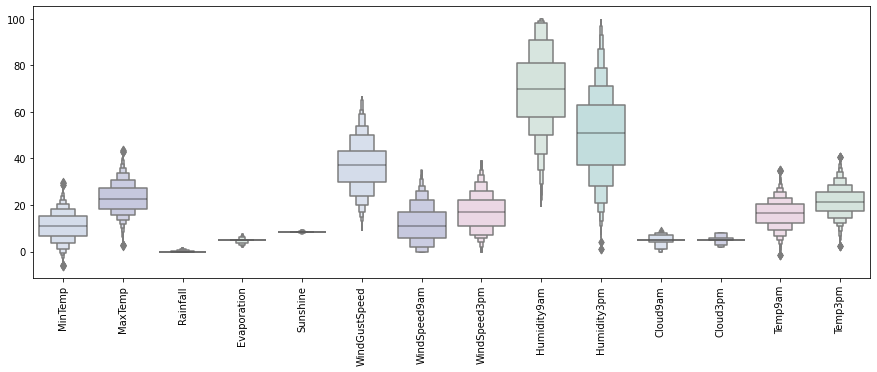

In [442]:
data1 = data[["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]]
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(15,5))
sns.boxenplot(data = data1,palette = colours)
plt.xticks(rotation=90)
plt.show()

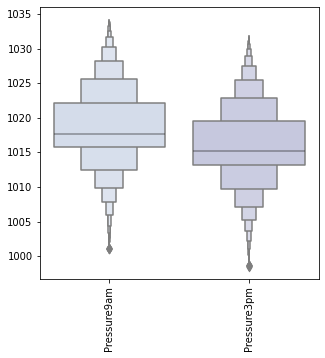

In [443]:
data1 = data[["Pressure9am", "Pressure3pm"]]
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(5,5))
sns.boxenplot(data = data1,palette = colours)
plt.xticks(rotation=90)
plt.show()

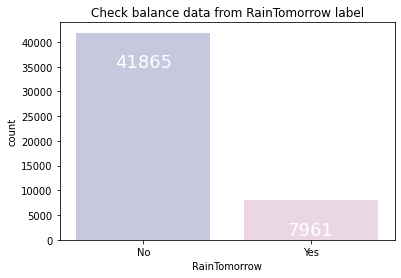

In [444]:
ax = sns.countplot(x = "RainTomorrow", data = data, palette= ["#C2C4E2","#EED4E5"])
ax.set_title("Check balance data from RainTomorrow label")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)

## Label encoding 

In [445]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [446]:
data["RainTomorrow"] = data["RainTomorrow"].apply(lambda x : 1 if  x == "Yes" else 0)
data["RainToday"] = data["RainToday"].apply(lambda x : 1 if  x == "Yes" else 0)

In [447]:
data.drop(columns = ["Date", "year", "month", "Day"], axis = 0, inplace = True)

In [448]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


## One-hot encoding 

In [449]:
data = pd.get_dummies(data)

In [450]:
data.shape

(49826, 115)

In [451]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [452]:
X = data.drop(["RainTomorrow"], axis = 1)
y = data["RainTomorrow"]

## Train - Test split 

In [453]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True) 

In [454]:
y_train.shape

(39860,)

In [455]:
y_test.shape

(9966,)

In [456]:
X_test_c = X_test.copy()
y_test_c = y_test.copy()

## Feature Scaling

In [457]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [458]:
X_train_df = pd.DataFrame(X_train, columns=[X.columns])
X_train_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,...,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000,39860.000000
mean,0.475309,0.499710,0.076308,0.506560,0.527487,0.479984,0.340405,0.438332,0.622011,0.497127,...,0.062318,0.067486,0.060537,0.117737,0.069267,0.043728,0.049022,0.064927,0.062945,0.053889
std,0.173269,0.158417,0.195657,0.127302,0.102725,0.185338,0.226334,0.201231,0.211094,0.187186,...,0.241735,0.250865,0.238482,0.322301,0.253912,0.204492,0.215916,0.246401,0.242868,0.225801
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.351955,0.388753,0.000000,0.518519,0.526316,0.362069,0.171429,0.282051,0.481481,0.363636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.474860,0.488998,0.000000,0.518519,0.526316,0.482759,0.314286,0.435897,0.629630,0.505051,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.597765,0.603912,0.000000,0.518519,0.526316,0.586207,0.485714,0.564103,0.765432,0.626263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [459]:
X_train_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.421788,0.689487,0.0,0.518519,0.526316,0.413793,0.171429,0.230769,0.493827,0.252525,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.103352,0.224939,0.0,0.518519,0.526316,0.603448,0.257143,0.487179,0.518519,0.444444,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.396648,0.520782,0.0,0.518519,0.526316,0.482759,0.371429,0.435897,0.469136,0.373737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.142458,0.440098,0.0,0.518519,0.526316,0.172414,0.114286,0.230769,0.530864,0.252525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.589385,0.877751,0.0,0.981481,0.526316,0.448276,0.000000,0.333333,0.691358,0.212121,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39855,0.586592,0.381418,0.0,0.518519,0.526316,0.586207,0.571429,0.512821,0.481481,0.646465,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39856,0.765363,0.672372,0.0,0.518519,0.526316,0.413793,0.628571,0.487179,0.641975,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39857,0.670391,0.821516,0.0,0.518519,0.526316,0.672414,0.542857,0.615385,0.629630,0.515152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39858,0.393855,0.457213,0.0,0.518519,0.526316,0.293103,0.371429,0.282051,0.555556,0.414141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Classification model

This section we will implement machine learning 

1.Decision Tree

2.Logistic regression

3.Random forest

4.Xg Boost

In [460]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, classification_report, f1_score, plot_roc_curve, accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

## Decision tree

In [461]:
ct = DecisionTreeClassifier(random_state= 1)
ct.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [462]:
y_pred_tree = ct.predict(X_test)
y_pred_tree_prob = ct.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


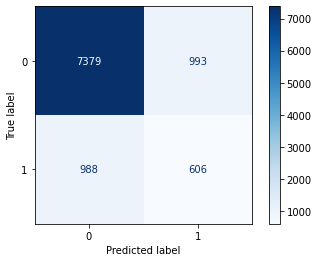

In [463]:
plot_confusion_matrix(ct, X_test, y_test, cmap = 'Blues')

In [464]:
roc_auc_tree_score = cross_val_score(estimator = ct, X = X_train, y = y_train, cv = 5, scoring = "roc_auc") 
roc_auc_tree_score = roc_auc_tree_score.mean()

## Logistic regression

In [465]:
clog = LogisticRegression(random_state= 1, max_iter =300)

In [466]:
clog.fit(X_train, y_train) 

LogisticRegression(max_iter=300, random_state=1)

In [467]:
y_pre_log = clog.predict(X_test) 
y_pred_log_prob = clog.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


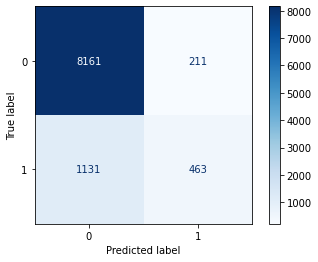

In [468]:
plot_confusion_matrix(clog, X_test, y_test, cmap = 'Blues')

In [469]:
roc_auc_log_score = cross_val_score(estimator = clog, X = X_train, y = y_train, cv = 5, scoring = "roc_auc")
roc_auc_log_score = roc_auc_log_score.mean()

## Random forest 

In [470]:
cran = RandomForestClassifier(random_state= 1)

In [471]:
cran.fit(X_train, y_train) 

RandomForestClassifier(random_state=1)

In [472]:
y_pred_ran = cran.predict(X_test) 
y_pred_ran_prob = cran.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


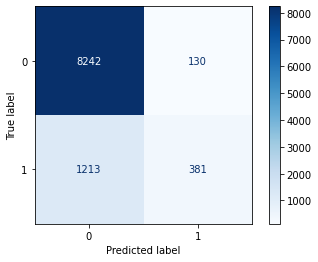

In [473]:
plot_confusion_matrix(cran, X_test, y_test, cmap = 'Blues')

In [474]:
roc_auc_ran_score = cross_val_score(estimator = cran, X = X_train, y = y_train, cv = 5, scoring = "roc_auc")
roc_auc_ran_score = roc_auc_ran_score.mean()

## XG Boost

In [475]:
cxg = XGBClassifier(random_state= 1)

In [476]:
cxg.fit(X_train, y_train) 

XGBClassifier(random_state=1)

In [477]:
y_pred_xg = cxg.predict(X_test) 
y_pred_xg_prob = cxg.predict_proba(X_test)[:, 1] 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


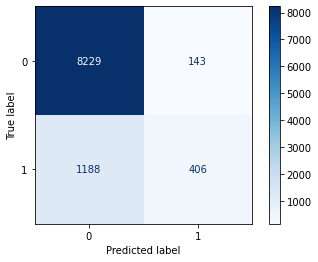

In [478]:
plot_confusion_matrix(cxg, X_test, y_test, cmap = 'Blues')

In [479]:
roc_auc_xg_score = cross_val_score(estimator = cxg, X = X_train, y = y_train, cv = 5, scoring = "roc_auc")
roc_auc_xg_score = roc_auc_xg_score.mean()

In [480]:
roc_auc_score_train = pd.DataFrame({ "model" : ["Decistion tree", "Logistic regreesion", "Random Forest", "XGboost"],
                                    "ROC_AUC_train" : [roc_auc_tree_score,roc_auc_log_score,roc_auc_ran_score,roc_auc_xg_score]})

In [481]:
roc_auc_score_train

,model,ROC_AUC_train
0,Decistion tree,0.631886
1,Logistic regreesion,0.819784
2,Random Forest,0.832399
3,XGboost,0.823613


In [482]:
y_pred_list = [y_pred_tree, y_pre_log,y_pred_ran, y_pred_xg]
y_pred_prob_list = [y_pred_tree_prob, y_pred_log_prob, y_pred_ran_prob, y_pred_xg_prob]
precision_list = []
recall_list = []
true_positive_rate_list = []
false_positive_rate_list =  []
f1_score_list = []
accuracy_list = []
roc_auc_list = []
for i in y_pred_list :
    cm = confusion_matrix(y_test, i)
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    precision = TP / float(TP + FP)
    recall = TP / float(TP + FN)
    true_positive_rate = TP / float(TP + FN)
    false_positive_rate = FP / float(FP + TN)
    f1score = 2 * (precision * recall) / (precision + recall)
    accuracy = accuracy_score(y_test, i)
    precision_list.append(precision)
    recall_list.append(recall)
    true_positive_rate_list.append(true_positive_rate)
    false_positive_rate_list.append(false_positive_rate)
    f1_score_list.append(f1score)
    accuracy_list.append(accuracy)


for j in y_pred_prob_list:
    roc_auc = roc_auc_score(y_test, j)
    roc_auc_list.append(roc_auc)

compare_df = pd.DataFrame({"model" : ["Decistion tree", "Logistic regreesion", "Random Forest", "XGboost"],
                           "precision" : precision_list, "recall" : recall_list, "true_positive_rate" : true_positive_rate_list, 
                           "false_positive_rate" : false_positive_rate_list,"accuracy" : accuracy_list, "F1-score" : f1_score_list,
                           "roc_auc" : roc_auc_list})

In [483]:
compare_df

,model,precision,recall,true_positive_rate,false_positive_rate,accuracy,F1-score,roc_auc
0,Decistion tree,0.881390,0.881917,0.881917,0.621013,0.801224,0.881654,0.630339
1,Logistic regreesion,0.974797,0.878282,0.878282,0.313056,0.865342,0.924026,0.809418
2,Random Forest,0.984472,0.871708,0.871708,0.254403,0.865242,0.924665,0.822885
3,XGboost,0.982919,0.873845,0.873845,0.260474,0.866446,0.925178,0.809303


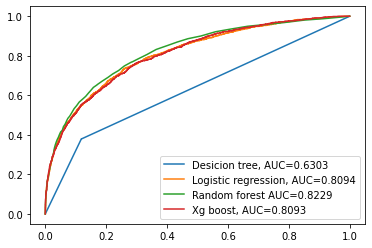

In [484]:
fpr, tpr, _ = roc_curve(y_test, y_pred_tree_prob)
auc = round(roc_auc_score(y_test, y_pred_tree_prob), 4)
plt.plot(fpr,tpr,label="Desicion tree, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_log_prob)
auc = round(roc_auc_score(y_test, y_pred_log_prob), 4)
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_ran_prob)
auc = round(roc_auc_score(y_test, y_pred_ran_prob), 4)
plt.plot(fpr,tpr,label="Random forest AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_xg_prob)
auc = round(roc_auc_score(y_test, y_pred_xg_prob), 4)
plt.plot(fpr,tpr,label="Xg boost, AUC="+str(auc))
plt.legend()

# Feature important 

Due to the dataset contain 114 features. It more than feature for apply to application, So This section we will use random forest feature_important option to find the rank of feature, And select only important feature for computing.

In [485]:
# cran.feature_importances_.shape
feature_rank = pd.DataFrame({"feature" : list(X.columns), "Score important" : cran.feature_importances_})
feature_rank = feature_rank.sort_values(by = "Score important", ascending = False)
feature_rank.head(20)

,feature,Score important
9,Humidity3pm,0.128390
15,Temp3pm,0.059123
1,MaxTemp,0.058491
0,MinTemp,0.057859
11,Pressure3pm,0.057334
8,Humidity9am,0.054382
14,Temp9am,0.054001
10,Pressure9am,0.052625
5,WindGustSpeed,0.050219
7,WindSpeed3pm,0.039311


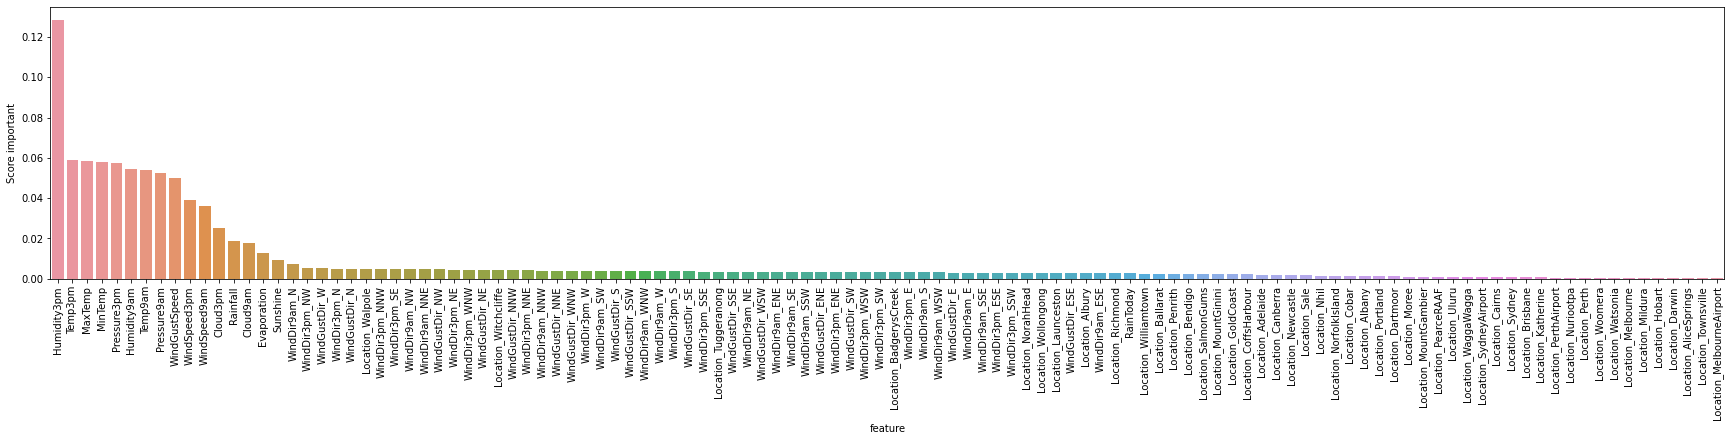

In [486]:
plt.figure(figsize=(30,5))
plt.xticks(rotation=90)
sns.barplot(data = feature_rank, x= "feature", y = "Score important")

In [487]:
top15 = feature_rank.iloc[:15,:]
list15 = []
for index, row in top15.iterrows():
    list15.append(row["feature"])
list15

['Humidity3pm',
 'Temp3pm',
 'MaxTemp',
 'MinTemp',
 'Pressure3pm',
 'Humidity9am',
 'Temp9am',
 'Pressure9am',
 'WindGustSpeed',
 'WindSpeed3pm',
 'WindSpeed9am',
 'Cloud3pm',
 'Rainfall',
 'Cloud9am',
 'Evaporation']

In [488]:
X_train_top15 = pd.DataFrame(X_train, columns=[X.columns])
X_train_top15 = X_train_top15[list15]
X_train_top15.head()

,Humidity3pm,Temp3pm,MaxTemp,MinTemp,Pressure3pm,Humidity9am,Temp9am,Pressure9am,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Cloud3pm,Rainfall,Cloud9am,Evaporation
0,0.252525,0.675393,0.689487,0.421788,0.586826,0.493827,0.484932,0.661631,0.413793,0.230769,0.171429,0.5,0.0,0.625,0.518519
1,0.444444,0.230366,0.224939,0.103352,0.784431,0.518519,0.227397,0.709970,0.603448,0.487179,0.257143,0.5,0.0,0.625,0.518519
2,0.373737,0.549738,0.520782,0.396648,0.395210,0.469136,0.457534,0.356495,0.482759,0.435897,0.371429,0.5,0.0,0.625,0.518519
3,0.252525,0.437173,0.440098,0.142458,0.500000,0.530864,0.312329,0.498489,0.172414,0.230769,0.114286,0.5,0.0,0.625,0.518519
4,0.212121,0.916230,0.877751,0.589385,0.410180,0.691358,0.627397,0.477341,0.448276,0.333333,0.000000,0.5,0.0,0.625,0.981481


In [489]:
X_train_top15 = X_train_top15.values

In [490]:
X_test_top15 = pd.DataFrame(X_test, columns=[X.columns])
X_test_top15 = X_test_top15[list15]
X_test_top15.head()

,Humidity3pm,Temp3pm,MaxTemp,MinTemp,Pressure3pm,Humidity9am,Temp9am,Pressure9am,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Cloud3pm,Rainfall,Cloud9am,Evaporation
0,0.525253,0.405759,0.393643,0.486034,0.500000,0.604938,0.449315,0.498489,0.189655,0.230769,0.257143,0.500000,0.142857,0.625,0.518519
1,0.141414,0.706806,0.665037,0.312849,0.500000,0.395062,0.567123,0.498489,0.637931,0.666667,0.200000,0.500000,0.000000,0.625,0.518519
2,0.404040,0.691099,0.674817,0.594972,0.470060,0.654321,0.627397,0.468278,0.293103,0.384615,0.000000,0.500000,0.000000,0.625,0.518519
3,0.262626,0.620419,0.633252,0.533520,0.604790,0.493827,0.534247,0.607251,0.413793,0.333333,0.571429,0.333333,0.000000,0.125,0.592593
4,0.262626,0.520942,0.513447,0.270950,0.401198,0.592593,0.367123,0.534743,0.741379,0.615385,0.428571,0.500000,0.000000,0.125,0.518519


In [491]:
X_test_top15 = X_test_top15.values

# Random forest important feature

In this section we will retest again after remove some feature

In [492]:
from sklearn.ensemble import RandomForestClassifier
cran15 = RandomForestClassifier(random_state= 1)

In [493]:
cran15.fit(X_train_top15, y_train)

RandomForestClassifier(random_state=1)

In [494]:
y_pred_ran_imp = cran15.predict(X_test_top15) 
y_pred_ran_prob_imp = cran15.predict_proba(X_test_top15)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


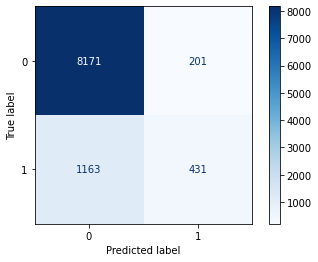

In [495]:
plot_confusion_matrix(cran15, X_test_top15, y_test, cmap = 'Blues')

In [496]:
roc_auc_ran_score_imp = cross_val_score(estimator = cran15, X = X_train_top15, y = y_train, cv = 5, scoring = "roc_auc")
roc_auc_ran_score_imp = roc_auc_ran_score_imp.mean()

In [497]:
roc_auc_score_train_imp = pd.DataFrame({ "model" : ["RF important"],
                                    "ROC_AUC_train" : [roc_auc_ran_score_imp]})
roc_auc_score_train = pd.concat([roc_auc_score_train, roc_auc_score_train_imp])
roc_auc_score_train

,model,ROC_AUC_train
0,Decistion tree,0.631886
1,Logistic regreesion,0.819784
2,Random Forest,0.832399
3,XGboost,0.823613
0,RF important,0.817822


In [498]:
cm = confusion_matrix(y_test, y_pred_ran_imp)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
f1score = 2 * (precision * recall) / (precision + recall)
accuracy = accuracy_score(y_test, y_pred_ran_imp)
roc_auc = roc_auc_score(y_test, y_pred_ran_prob_imp)

compare_df_imp = pd.DataFrame({"model" : ["RF important"],
                           "precision" : precision, "recall" : recall, "true_positive_rate" : true_positive_rate, 
                           "false_positive_rate" : false_positive_rate,"accuracy" : accuracy, "F1-score" : f1score,
                           "roc_auc" : roc_auc})
compare_df = pd.concat([compare_df, compare_df_imp])

In [499]:
compare_df

,model,precision,recall,true_positive_rate,false_positive_rate,accuracy,F1-score,roc_auc
0,Decistion tree,0.881390,0.881917,0.881917,0.621013,0.801224,0.881654,0.630339
1,Logistic regreesion,0.974797,0.878282,0.878282,0.313056,0.865342,0.924026,0.809418
2,Random Forest,0.984472,0.871708,0.871708,0.254403,0.865242,0.924665,0.822885
3,XGboost,0.982919,0.873845,0.873845,0.260474,0.866446,0.925178,0.809303
0,RF important,0.975991,0.875402,0.875402,0.318038,0.863135,0.922964,0.801704


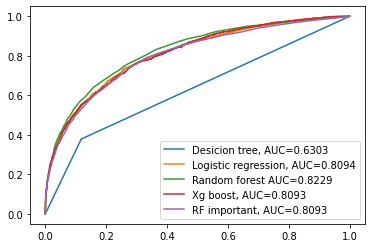

In [500]:
fpr, tpr, _ = roc_curve(y_test, y_pred_tree_prob)
auc = round(roc_auc_score(y_test, y_pred_tree_prob), 4)
plt.plot(fpr,tpr,label="Desicion tree, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_log_prob)
auc = round(roc_auc_score(y_test, y_pred_log_prob), 4)
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_ran_prob)
auc = round(roc_auc_score(y_test, y_pred_ran_prob), 4)
plt.plot(fpr,tpr,label="Random forest AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_xg_prob)
auc = round(roc_auc_score(y_test, y_pred_xg_prob), 4)
plt.plot(fpr,tpr,label="Xg boost, AUC="+str(auc))
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_pred_ran_prob_imp)
auc = round(roc_auc_score(y_test, y_pred_xg_prob), 4)
plt.plot(fpr,tpr,label="RF important, AUC="+str(auc))
plt.legend()

# Save model for deploy

In [587]:
import joblib
joblib.dump(cran15sc, 'randomforest1.pkl',4)

['randomforest1.pkl']

In [ ]:
joblib.dump(sc1, 'scaler.pkl') 